## Анализ данных высокой размерности, МТУСИ

## Практическое задание 1

### Общая информация
Дата выдачи: 20.11.2021

__Студент:__ Семенов А.И.

__Группа:__ МБД2032




### О задании

Практическое задание 1 посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 


## Библиотеки для анализа данных

### NumPy

Во всех заданиях данного раздела запрещено использовать циклы  и list comprehensions. Под вектором и матрицей в данных заданиях понимается одномерный и двумерный numpy.array соответственно.

In [3]:
import numpy as np

**1.** Реализуйте функцию, возвращающую максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой. Для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответом является 5. Если нулевых элементов нет, функция должна возвращать None.


In [4]:
def max_element(arr):
    return arr.max()

In [5]:
arr = np.arange(12)
print('Вектор: {}, максимальное значение вектора: {}'.format(arr, max_element(arr)))


Вектор: [ 0  1  2  3  4  5  6  7  8  9 10 11], максимальное значение вектора: 11


**2.** Реализуйте функцию, принимающую на вход матрицу и некоторое число и возвращающую ближайший к числу элемент матрицы. Например: для X = np.arange(0,10).reshape((2, 5)) и v = 3.6 ответом будет 4.

In [6]:
def nearest_value(X, value):
    X = X.reshape(X.size)
    num = abs((X[0] / value) - 1)
    ans = 0
    
    for i in range(1, X.size):

        near = abs((X[i]/value) - 1)
        near = round(near, 3)

        if near <= 0.5 and near <= num:

            num = near
            ans = i
                
    return X[ans]
            

In [7]:
# тест для задания 2
test_data = {4.4:np.arange(20).reshape(2,10),
            7.7:np.arange(5,20).reshape(3,5),
            -5.5:np.arange(-10,20).reshape(3,10)}
test_ans = {4.4:4,
            7.7:8,
            -5.5:-5}

for i in test_data:
    ans = nearest_value( test_data[i], i)
    print("{} : {}".format(ans, test_ans[i] == ans))

4 : True
8 : True
-5 : True


**3.** Реализуйте функцию scale(X), которая принимает на вход матрицу и масштабирует каждый ее столбец (вычитает выборочное среднее и делит на стандартное отклонение). Убедитесь, что в функции не будет происходить деления на ноль. Протестируйте на случайной матрице (для её генерации можно использовать, например, функцию [numpy.random.randint](http://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html)).

* a.ravel()    #  "Сплющивает" массив до одной оси
* a.shape    #  Узнаем форму массива (кортеж на выходе)
* a.size    # узнать величину массива (число на выходе)

* a.reshape(2, 6)    #  Возвращает массив с измененной формой

Возвращается новый массив в то время как исходный массив не изменяется.вернется среднее значение и стандартное отклонение mu, std_dev = norm.fit(W)

In [8]:
from scipy.stats import norm

def scale(X):
    ans = np.array([])
    W = X.reshape(X.size)
    
    mu, std_dev = norm.fit(W)

    for i in W:
        if i != 0:
            value = (i - mu) / std_dev
            value = round(value, 4)
            ans = np.append(ans, value)

        else:
            ans = np.append(ans, i)
    
    ans.resize(X.shape)
    
    return ans
    

In [9]:
# тест для задания 3
test_data = {1:np.random.randint(10, size=(5,2)),
             2: np.random.randint(20, size=(5,4))}

for i in test_data:

    print("Изначальная матрица: \n {} \n Преобразованная матрица:\n {}".format(test_data[i],  scale(test_data[i])))

Изначальная матрица: 
 [[1 3]
 [0 8]
 [7 8]
 [4 4]
 [8 9]] 
 Преобразованная матрица:
 [[-1.3728 -0.7191]
 [ 0.      0.9152]
 [ 0.5883  0.9152]
 [-0.3922 -0.3922]
 [ 0.9152  1.2421]]
Изначальная матрица: 
 [[19 12  2 12]
 [15  1  8  9]
 [ 7  4  6 15]
 [ 7  6 11 15]
 [15  5  2  6]] 
 Преобразованная матрица:
 [[ 2.0208  0.6272 -1.3638  0.6272]
 [ 1.2244 -1.5629 -0.1692  0.0299]
 [-0.3683 -0.9656 -0.5674  1.2244]
 [-0.3683 -0.5674  0.4281  1.2244]
 [ 1.2244 -0.7665 -1.3638 -0.5674]]


In [10]:
test_data = {1:np.random.randint(10, size=(5,2)),
             2: np.random.randint(20, size=(5,4))}
test_data[2]

array([[ 4, 14,  0, 13],
       [ 8,  0,  3, 10],
       [10,  2,  7, 15],
       [ 5, 10,  7,  7],
       [ 3, 13,  6, 17]])

**4.** Реализуйте функцию, которая для заданной матрицы находит:
 - определитель
 - след
 - наименьший и наибольший элементы
 - норму Фробениуса
 - собственные числа
 - обратную матрицу

__Норма Фробениуса__ 

    Или Евклидова норма, — это квадратный корень сумм квадратов модулей элементов матрицы размера m × n:
    * linalg.norm(a, ord=None) — норма матрицы a, по умолчанию норма Фробениуса для матриц и L2-норма для векторов;

    __ИЛИ:__ как квадратный корень произведения следа этой матрицы и эрмитово-сопряжённой матрицы.

__Нормальное распределение__ 

    Является двухпараметрическим семейством распределений,Стандартным нормальным распределением называется нормальное распределение с математическим ожиданием  mu =0 и стандартным отклонением `sigma =1`.Здесь `loc` представляет среднее значение, а `scale` -стандартное отклонение, т. е. квадратный корень дисперсии.

    `arr = np.random.normal(loc=1, scale=0.50, size=(500, 500))`

__Стандартное отклонение__

    Около 68 % значений из нормального распределения находятся на расстоянии не более одного стандартного отклонения `σ` от среднего; около 95 % значений лежат расстоянии не более двух стандартных отклонений; и 99,7 % не более трёх.

__След матрицы__ 

    Это сумма элементов квадратной матрицы, расположенных на главной диагонали.

    np.trace(b)
    np.diagonal(b)


__Обратимость__

    Матрица обратима тогда и только тогда, когда она невырождена, то есть её определитель (|A|) не равен нулю. Для неквадратных матриц и вырожденных матриц обратных матриц не существует.

__Обратная матрица__

    Обратной матрицей A-1 матрицы A называют матрицу, удовлетворяющую следующему равенству:

    $$ A x A^-1 = A ^-1 x A = E $$

    где – E это единичная матрица

In [11]:

import numpy as np

def get_stats(X):
    #1 min elment in matrix
    my_min = X.min()
    
    # max element in matrix
    my_max = X.max()
    
    #2 eigenvalue
    A_eig = np.linalg.eig(X)
    
    #3 matrix track
    A_trace = np.diagonal(X)
    
    #4 norm Frobenius
    A_normfro = np.linalg.norm(X)
    
    #5 determinant
    A_det = np.linalg.det(X)
    
    
    
    #6 inverse matrix
    if A_det != 0:
        A_inv_mat = np.linalg.inv(X)
        
    else:
        A_inv_mat = "матрица вырожденная"
        print("матрица вырожденная")
        
    print ("""определитель:{0} \n\n след: {1} \n\n  наименьший элемент: {2} и наибольший элемент: {3} \n\n норму Фробениуса: {4} \n\n, собственные числа: {5} \n\n обратную матрицу: {6}""".format(A_det, A_trace, my_min, my_max, A_normfro, A_eig,  A_inv_mat,  ))
    
    

In [12]:
# тест для задания 4
test_data = np.random.normal(loc=10, scale=1, size=(10,10))
get_stats(test_data)

определитель:9226.012199800787 

 след: [10.6506036   9.36561274 10.07752853  9.47811881 11.69320151 10.15682637
  9.6804076   9.23267719  9.12856701 10.50309291] 

  наименьший элемент: 8.497748572424568 и наибольший элемент: 12.169734798299707 

 норму Фробениуса: 102.11349612298075 

, собственные числа: (array([101.74541103+0.j        ,  -3.16901997+0.j        ,
         2.74931452+0.j        ,   0.45044662+2.17424401j,
         0.45044662-2.17424401j,  -1.1173119 +1.27930268j,
        -1.1173119 -1.27930268j,  -0.44519142+0.j        ,
         0.20992633+1.26471499j,   0.20992633-1.26471499j]), array([[ 3.12562373e-01+0.j        , -9.91650074e-03+0.j        ,
        -3.01899360e-02+0.j        , -1.18172356e-01-0.36250169j,
        -1.18172356e-01+0.36250169j,  2.35841308e-01+0.08329299j,
         2.35841308e-01-0.08329299j, -1.63625326e-01+0.j        ,
        -2.90842417e-01-0.08217371j, -2.90842417e-01+0.08217371j],
       [ 3.11409369e-01+0.j        , -1.08335765e-02+0.j      


**5.** Повторите 100 раз следующий эксперимент: сгенерируйте две матрицы размера 10×10 из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль?

__Квантиль__ — это значение, ниже которого лежит определённое число наблюдений, соответствующих выбранной частоте.

__Функция quantile()__ вычисляет q-й квантиль значений элементов массива или элементов вдоль указанной оси.

Единственное отличие квантиля от процентиля - диапазон значений параметра q принимает значения в интервале [0, 1].

Параметры:

* a - массив NumPy или подобный массиву объект.

Входные данные.

* q - вещественное число, массив NumPy или подобный массиву объект.

Квантиль или последовательность квантилей. Допустимые значения находятся в интервале [0, 1]..

* axis - целое число или кортеж целых чисел, необязательный параметр.

Указывает ось или оси по которым выполняется вычисление. По умолчанию axis = None, что соответствует вычислению квантиля 
так, словно a сжат до одной оси.

* out - массив NumPy, необязательный параметр.

Массив в который можно поместить результат функции. Данный массив должен соответствовать форме и типу данных результирующего массива функции (зачастую, тип данных может быть преобразован автоматически). Указание данного параметра, позволяет избежать лишней операции присваивания тем самым немного ускоряя работу вашего кода. Полезный параметр если вы очень часто обращаетесь к функции в цикле.

* overwrite_input - True или False, необязательный параметр.

Значение True позволяет использовать входной массив a для промежуточных вычислей, что позволяет сэкономит память но приводит к потере данных.

* interpolation - {‘linear’, ‘lower’, ‘higher’, ‘midpoint’, ‘nearest’}, необязательный параметр.

__Процентиль__ показывает процент наблюдений, лежащих ниже выбранного значения

In [13]:

max_value = []

for exp_num in range(100):
    
    MY_MATRIX1 = np.random.normal(loc=0, scale=1, size=(10,10))
    MY_MATRIX2 = np.random.normal(loc=0, scale=1, size=(10,10))
    MAT_DOT = np.dot(MY_MATRIX1, MY_MATRIX2)
    
    max_value.append(MAT_DOT.max())
    

   
my_mean = np.mean(max_value)
myquantile = np.quantile(max_value, q=0.95)

print("среднее значение среди максимальных: {} \n 95 процентный квантиль: {} \n ".format(my_mean, myquantile))



среднее значение среди максимальных: 8.18514804872087 
 95 процентный квантиль: 10.938435498147813 
 


### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

[Данные](https://www.dropbox.com/s/dvfitn93obn0rql/2008.csv?dl=0) и их [описание](http://stat-computing.org/dataexpo/2009/the-data.html)

2	Month	1-12

3	DayofMonth	1-31

4	DayOfWeek	1 (Monday) - 7 (Sunday)

5	DepTime	actual departure time (local, hhmm)

6	CRSDepTime	scheduled departure time (local, hhmm)

7	ArrTime	actual arrival time (local, hhmm)

8	CRSArrTime	scheduled arrival time (local, hhmm)

9	UniqueCarrier	unique carrier code

10	FlightNum	flight number

11	TailNum	plane tail number

12	ActualElapsedTime	in minutes

13	CRSElapsedTime	in minutes

14	AirTime -	in minutes

15	ArrDelay - 	arrival delay, in minutes

16	DepDelay - 	departure delay, in minutes

17	Origin	 - origin

18	Dest  -	destination

19	Distance - 	in miles

20	TaxiIn	taxi in time, in minutes

21	TaxiOut	taxi out time in minutes

22	Cancelled	was the flight cancelled?

23	CancellationCode	reason for cancellation (A = carrier, B = weather, C = NAS, D = security)

24	Diverted	1 = yes, 0 = no

25	CarrierDelay	in minutes

26	WeatherDelay	in minutes

27	NASDelay	in minutes

28	SecurityDelay	in minutes

29	LateAircraftDelay	in minutes


In [14]:
import pandas as pd
%matplotlib inline

frame = pd.read_csv("2008.csv", header=0, sep=',')
print("В таблице {} строка, таблица представляет из себя данные по авиарейсам".format(frame.shape))
frame.tail(10)

В таблице (70000, 29) строка, таблица представляет из себя данные по авиарейсам


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
69990,2008,12,23,2,1627.0,1630,1714.0,1715,MQ,3092,...,9.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69991,2008,4,24,4,914.0,920,1235.0,1231,NW,241,...,11.0,21.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69992,2008,11,4,2,754.0,801,1027.0,1039,UA,885,...,5.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69993,2008,2,28,4,1410.0,1400,1501.0,1455,MQ,3547,...,5.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69994,2008,1,26,6,920.0,925,1110.0,1118,OH,5218,...,12.0,13.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69995,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,22.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69996,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,4.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,22.0
69997,2008,9,24,3,1012.0,1012,1132.0,1132,YV,7058,...,7.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69998,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,20.0,22.0,0,NaN,0,0.0,0.0,15.0,0.0,6.0
69999,2008,12,6,6,859.0,900,959.0,1005,WN,510,...,2.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [15]:
frame.isnull().sum()

Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime               1399
CRSDepTime               0
ArrTime               1556
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum                820
ActualElapsedTime     1582
CRSElapsedTime           9
AirTime               1582
ArrDelay              1582
DepDelay              1399
Origin                   0
Dest                     0
Distance                 0
TaxiIn                1556
TaxiOut               1406
Cancelled                0
CancellationCode     68589
Diverted                 0
CarrierDelay         54747
WeatherDelay         54747
NASDelay             54747
SecurityDelay        54747
LateAircraftDelay    54747
dtype: int64

**6.** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

(A = carrier, B = weather, C = NAS, D = security)

In [16]:
cancelled_reason = frame.groupby("CancellationCode")["Cancelled"].sum().idxmax()
print("ОТВЕТ:Наиболее частая отмена рейсов: {} - carrier".format(cancelled_reason))


ОТВЕТ:Наиболее частая отмена рейсов: A - carrier


**7.** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [17]:
max_dist = frame["Distance"].max()
min_dist = frame["Distance"].min()
mean_dist = frame["Distance"].mean()

print("ОТВЕТ:Масимальное растояние(в милях) пройденное самолетом: {} \n Минимальное расстояние(в милях): {} \n Среднее расстояние(в милях): {:0.2f}".format(max_dist, min_dist, mean_dist))

ОТВЕТ:Масимальное растояние(в милях) пройденное самолетом: 4962 
 Минимальное расстояние(в милях): 31 
 Среднее расстояние(в милях): 724.51


**8.** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [18]:
import pandas as pd
%matplotlib inline

frame = pd.read_csv("2008.csv", header=0, sep=',')

# Очищаем от отменённых рейсов
frame = frame[(frame["Cancelled"] == 0)]

# Только с минимальным пройденнным расстоянием
my_frame = frame[frame["Distance"] <= 31][["Month", "DayofMonth", "FlightNum", "Distance"]]
print("ОТВЕТ: Номер рейса и день с мин. расстоянием \n\n {} ".format(my_frame))

#Какое расстояние было пройдено этими же рейсами в другие дни?
#flight_num = my_frame["FlightNum"].unique()
#frame[frame["Distance"] <= 31][ "FlightNum"].unique())

frame[(frame["FlightNum"] == 65 ) | (frame["FlightNum"] == 64 ) ][["FlightNum","Distance"]]

ОТВЕТ: Номер рейса и день с мин. расстоянием 

        Month  DayofMonth  FlightNum  Distance
1116      12          30         65        31
27534      3          11         64        31
46082      8           9         65        31
48112      2          28         64        31 


,FlightNum,Distance
501,64,533
1116,65,31
1389,64,680
1517,65,680
2619,64,2381
...,...,...
66529,65,82
67172,64,533
68264,65,386
68338,65,2454


**9.** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [19]:
import pandas as pd
%matplotlib inline

frame = pd.read_csv("2008.csv", header=0, sep=',')

In [20]:
# Очищаем от отменённых рейсов
frame = frame[(frame["Cancelled"] == 0)]

# подсчитываем общее количество вылетов для каждого аэропорта и находим максимальное значение
ans = frame["Origin"].value_counts()
ans = ans[ans == ans.max()]

print("ОТВЕТ: Аэропорта с наибольшем количеством вылетов:\n{}".format(ans), "PS: ATL-Атланта")



ОТВЕТ: Аэропорта с наибольшем количеством вылетов:
ATL    4078
Name: Origin, dtype: int64 PS: ATL-Атланта


**10.** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [21]:
import pandas as pd
%matplotlib inline

frame = pd.read_csv("2008.csv", header=0, sep=',')

# Очищаем от отменённых рейсов
frame = frame[(frame["Cancelled"] == 0)]

# среднее время полета (AirTime) по всем вылетевшем из него рейсам
frame1 = frame.groupby("Origin")["AirTime"].mean()

# наибольшее значение среднего время полёта соответствуеь (San Juan Airport)
frame2 = frame1[frame1==frame1.max()]

print("ОТВЕТ:Cреднее время полета (AirTime) по всем вылетевшем из него рейсам: \n{} \n\n".format(frame1))
print("ОТВЕТ:Аэропорт с наибольшим значением среднего время полёта:\n{}".format(frame2))

ОТВЕТ:Cреднее время полета (AirTime) по всем вылетевшем из него рейсам: 
Origin
ABE    88.266667
ABI    36.400000
ABQ    93.454321
ABY    35.714286
ACK    50.800000
         ...    
WRG    18.000000
XNA    85.945736
YAK    35.900000
YKM    79.000000
YUM    47.470588
Name: AirTime, Length: 296, dtype: float64 


ОТВЕТ:Аэропорт с наибольшим значением среднего время полёта:
Origin
SJU    205.2
Name: AirTime, dtype: float64


**11.** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).



In [22]:
import pandas as pd
%matplotlib inline

frame = pd.read_csv("2008.csv", header=0, sep=',')


#1.Исключим  аэропорты c  отправлением меньше 1000 рейсов
fn_flt= frame.groupby('Origin').filter(lambda x: x['Origin'].value_counts() > 1000)

#2.сортируем аэропорты где имеется задержка в отправлении DepDelay 
num_dep_delay = fn_flt[fn_flt["DepDelay"] > 0].groupby("Origin")["FlightNum"].count()
num_dep = fn_flt.groupby("Origin")["FlightNum"].count()

#3.выбираем аэропортs у которых доля задерженных вылетов наибольшая
ans = num_dep_delay.div(num_dep)
ans = ans[ans == ans.max()]

#print("Количестов вылетов с задержкой:\n\n ", num_dep_delay, "\n\n Общее количестов вылетов: ", num_dep)
print("ОТВЕТ: Аэропорт с наибольшим долей задержанных вылетов \n\n{}".format(ans))


ОТВЕТ: Аэропорт с наибольшим долей задержанных вылетов 

Origin
EWR    0.511159
Name: FlightNum, dtype: float64


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**12.** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [23]:
import pandas as pd
df = pd.read_csv("2008.csv", header=0, sep=',')


__Результат:__

* Имеются ли в данных пропущенные значения? - Да
* Сколько всего пропущенных элементов в таблице "объект-признак"? - 355215
* Сколько объектов имеют хотя бы один пропуск? - 16
* Сколько признаков имеют хотя бы одно пропущенное значение? 70000

In [24]:
df.isnull().sum()

Year                     0
Month                    0
DayofMonth               0
DayOfWeek                0
DepTime               1399
CRSDepTime               0
ArrTime               1556
CRSArrTime               0
UniqueCarrier            0
FlightNum                0
TailNum                820
ActualElapsedTime     1582
CRSElapsedTime           9
AirTime               1582
ArrDelay              1582
DepDelay              1399
Origin                   0
Dest                     0
Distance                 0
TaxiIn                1556
TaxiOut               1406
Cancelled                0
CancellationCode     68589
Diverted                 0
CarrierDelay         54747
WeatherDelay         54747
NASDelay             54747
SecurityDelay        54747
LateAircraftDelay    54747
dtype: int64

In [25]:
df.isnull().sum().sum()

355215

In [26]:
(df.isnull().sum(axis=1) > 0).sum()

70000

Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:


Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

__Ответ:__

__1. Имеются ли пропущенные значения в целевой переменной?__

ДА

__2. Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.__

Предобработать бъекты с пропущенными значениями целевой переменой, можно удалив их из датасета, главное не удалять слишком много, чтобы оставалась возможность провести надежный анализ. Т.К. возможен риск потери ценной информации.  Внашем случае целевая переменная отсутствует в 1399 случаях , это 0.01 % от всех значений целевой переменной, можно заменить на средние. 
 
 Пропуски в значениях целевой переменной, возможно связанны с пропусками в ключевых признаках.
 
 Признаки CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay в дальнейшем рассмотрении будут удалены т.к. имеет наибольшее количество пропущенных значений.

In [27]:
df["DepDelay"].isnull().sum()

1399

In [28]:
df[df["DepDelay"].isnull()]

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
11,2008,3,6,4,NaN,1605,NaN,1940,AA,484,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
78,2008,1,19,6,NaN,750,NaN,930,EV,4772,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
103,2008,7,24,4,NaN,1230,NaN,1355,FL,816,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
112,2008,2,4,1,NaN,620,NaN,758,NW,1281,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
128,2008,1,21,1,NaN,1838,NaN,2005,UA,1251,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69818,2008,6,9,1,NaN,1645,NaN,1800,MQ,3627,...,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
69836,2008,1,25,5,NaN,938,NaN,1030,MQ,3254,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
69884,2008,12,26,5,NaN,1935,NaN,2116,NW,1430,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
69918,2008,3,1,6,NaN,600,NaN,742,EV,4715,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN


**13.** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [29]:
import pandas as pd
df = pd.read_csv("2008.csv", header=0, sep=',')


In [30]:
for feature in ["DepTime", "CRSDepTime", "ArrTime", "CRSArrTime", "ActualElapsedTime", "CRSElapsedTime"]:
    
    # маска для вещественных значений
    features_mask = df[feature].isna()
    
    
    df["{}_Hour".format(feature)] = df[feature][~features_mask] // 100
    
    df["{}_Minute".format(feature)] = df[feature][~features_mask] % 100
    
    df.drop([feature], axis=1, inplace=True)


**14.** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

__Ответ:__ Признаки подлежат исключению, т.к. имеют много пропусков более 70%, практика с заменой не возможна. В противном случае это приведёт к зашумлению и утери полезной информации, связь с целевой переменной потеряется. ("CancellationCode","CarrierDelay", "WeatherDelay", "NASDelay ", "SecurityDelay", "LateAircraftDelay")
UniqueCarrier - 



In [31]:

y = df["DepDelay"]
y = y.fillna(y.mean())

df.drop(['DepDelay', 'TailNum', 'Year', "CancellationCode",
         "CarrierDelay", "WeatherDelay","NASDelay","SecurityDelay",
         "LateAircraftDelay", "TaxiIn", "TaxiOut"], axis=1,  inplace=True)
X = df

In [32]:
X.isnull().sum()

Month                          0
DayofMonth                     0
DayOfWeek                      0
UniqueCarrier                  0
FlightNum                      0
AirTime                     1582
ArrDelay                    1582
Origin                         0
Dest                           0
Distance                       0
Cancelled                      0
Diverted                       0
DepTime_Hour                1399
DepTime_Minute              1399
CRSDepTime_Hour                0
CRSDepTime_Minute              0
ArrTime_Hour                1556
ArrTime_Minute              1556
CRSArrTime_Hour                0
CRSArrTime_Minute              0
ActualElapsedTime_Hour      1582
ActualElapsedTime_Minute    1582
CRSElapsedTime_Hour            9
CRSElapsedTime_Minute          9
dtype: int64

**15.** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

In [33]:
#1. Пропуски, замена на среднии
#2. One-hot кодирование
#3. Нормализация\\стандартизация

<AxesSubplot:>

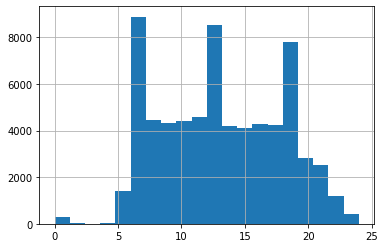

In [34]:
X['DepTime_Hour'].hist(bins=20)

In [35]:
X['TaxiIn'].hist(bins=20)

KeyError: 'TaxiIn'

<AxesSubplot:>

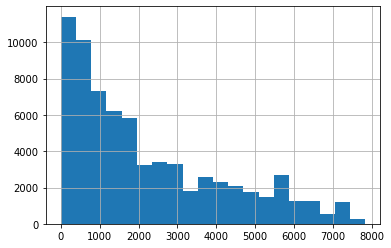

In [36]:
X['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

__ОТВЕТ:__ Наблюдаются выбросы, большие отклонения, котоорые будут негативно влиять на предсказание модели), необходимо масштабировать признаки, используя scklearn инструменты StandartScaler/minMaxScaler

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

get_dummies(drop_first=True). - Необходимо удалить один из столбцов, созданных для каждого признака. Для этого в надо поставить

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [37]:
# заменим пропуски на "0" в вещественных признаках
X_real = X[X.columns[(X.dtypes=="float64")]].fillna(0)
X_real.isnull().sum()


AirTime                     0
ArrDelay                    0
DepTime_Hour                0
DepTime_Minute              0
ArrTime_Hour                0
ArrTime_Minute              0
ActualElapsedTime_Hour      0
ActualElapsedTime_Minute    0
CRSElapsedTime_Hour         0
CRSElapsedTime_Minute       0
dtype: int64

In [38]:
# заменим пропуски на "0" в вещественных признаках
X = X.fillna(0)

# обратим внимание на категориальные признаки
X.columns[(X.dtypes=="object").values]

Index(['UniqueCarrier', 'Origin', 'Dest'], dtype='object')

In [39]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def transform_data(data):
    #one-hot, так же удалим изначальный столбец drop_first=True
    X_dum = pd.get_dummies(data, drop_first=True)

    #масштабирование признаков
    stander = StandardScaler()
    X_stand = stander.fit_transform(X_dum)
    X = pd.DataFrame(data=X_stand)
    return X

Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

In [40]:
X = transform_data(X)


In [41]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,624,625,626,627,628,629,630,631,632,633
0,-0.111232,0.256159,-0.463891,-1.004665,-0.805728,0.002552,-0.738324,-0.143429,-0.049486,1.627386,...,-0.015586,-0.044926,-0.011953,-0.03072,-0.01134,-0.00756,-0.045402,-0.014144,-0.010001,-0.021718
1,-0.111232,-1.332282,-0.463891,0.084156,0.096865,-0.157504,0.193626,-0.143429,-0.049486,0.246361,...,-0.015586,-0.044926,-0.011953,-0.03072,-0.01134,-0.00756,-0.045402,-0.014144,-0.010001,-0.021718
2,0.473737,-1.445742,1.540176,-0.227008,0.344350,-0.717701,0.481876,-0.143429,-0.049486,-0.345507,...,-0.015586,-0.044926,-0.011953,-0.03072,-0.01134,-0.00756,-0.045402,-0.014144,-0.010001,-0.021718
3,-1.573653,0.823459,-0.463891,0.808339,-0.325316,-0.530969,-0.340433,-0.143429,-0.049486,-0.345507,...,-0.015586,-0.044926,-0.011953,-0.03072,-0.01134,-0.00756,-0.045402,-0.014144,-0.010001,-0.021718
4,-0.403716,-1.332282,1.540176,-0.924709,0.504488,-0.664349,0.646338,-0.143429,-0.049486,-0.937375,...,-0.015586,-0.044926,-0.011953,-0.03072,-0.01134,-0.00756,-0.045402,-0.014144,-0.010001,-0.021718


**16. (0.5 балла)** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [42]:
from sklearn.model_selection import train_test_split, cross_val_score
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**17.** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [43]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import r2_score, mean_squared_error


# model fiting w coef
lr = LinearRegression()
lr_model = lr.fit(x_train.iloc[:1000], y_train.iloc[:1000])

# predict y-values for test and train dataset
y_test_predict =lr_model.predict(x_test)
y_train_predict = lr_model.predict(x_train.iloc[:1000])

# r2 scores for model (estimation)
r2_test = r2_score(y_test, y_test_predict)
r2_train = r2_score(y_train.iloc[:1000], y_train_predict)

# mse score for model (estimation)
mse_test = mean_squared_error(y_test, y_test_predict)
mse_train = mean_squared_error(y_train.iloc[:1000], y_train_predict)


print("R2 for test: {} \n\n R2 for train: {} \n\n MSE for test: {} \n\n MSE for train: {}".format(r2_test, r2_train, mse_test, mse_train) )

R2 for test: -9.043693437966633e+26 

 R2 for train: 0.9569387342023659 

 MSE for test: 1.1359157730055437e+30 

 MSE for train: 43.119784872818215


ениваете свою оценку по невидимым данным, что может привести к результатам вне [0,1]. модель еще хуже, чем предполагаемая наихудшая модель  Это может возникнуть, когда прогнозы, которые сравниваются с соответствующими результатами, не были получены из процедуры подгонки модели с использованием этих данных. Даже если была использована процедура подгонки модели, R2 все равно может быть отрицательным, например, когда линейная регрессия проводится без включения перехвата или когда для подгонки данных используется нелинейная функция. В тех случаях, когда возникают отрицательные значения, среднее значение данных обеспечивает лучшее соответствие результатам, чем соответствующие значения функций, в соответствии с этим конкретным критерием/ среднее значение вашего тестового набора сильно отличается от среднего вашего набора тренировок. Это само по себе может вызвать гораздо более высокую поведенческую ошибку в вашем прогнозе, чем просто предсказать среднее значение тестовых данных, что приводит к отрицательной оценке r^2.

В худшем случае, если ваши данные вообще не объясняют вашу цель, эти баллы могут стать очень сильно отрицательными.

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

**18.** Обучите линейные регрессии с L1- и L2-регуляризатором, подобрав лучшее значение параметра регуляризации из списка alpha_grid при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах, что и в п.17. Выведите значения $MSE$ и $R^2$ на обучающей и контрольной выборках. Удалось ли решить указанные вами ранее проблемы?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).


In [44]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

x_train = x_train.iloc[:1000]
y_train = y_train.iloc[:1000]

kfold = KFold(n_splits=5).split(x_train)

ridge_regression = RidgeCV(alphas=[0.001, 0.1, 1, 10])
lasso_regression = LassoCV(alphas=[0.001, 0.1])

#kfold for l1 l2 model
score_ridge = cross_val_score(ridge_regression, x_train, y_train, scoring="r2", cv=5)
score_lasso = cross_val_score(lasso_regression, x_train, y_train, scoring="r2", cv=5)

#fiting model ridge L2-reg    
ridge_model = ridge_regression.fit(x_train, y_train)

#fiting model lasso L1-reg 
lasso_model = lasso_regression.fit(x_train, y_train)

# predict y-values ridge
y_train_predict = ridge_model.predict(x_train)
y_test_predict = ridge_model.predict(x_test)

#r2 score for model ridge
r2_train = r2_score(y_train, y_train_predict)
r2_test = r2_score(y_test, y_test_predict)

#mse score for model ridge
mse_train = mean_squared_error(y_train, y_train_predict)
mse_test = mean_squared_error(y_test, y_test_predict)


# predict y-values lasso
y_train_predict_lasso = lasso_model.predict(x_train)
y_test_predict_lasso = lasso_model.predict(x_test)

#r2 score for model lasso
r2_train_lasso = r2_score(y_train, y_train_predict_lasso)
r2_test_lasso = r2_score(y_test, y_test_predict_lasso)

#mse score for model lasso
mse_train_lasso = mean_squared_error(y_train, y_train_predict_lasso)
mse_test_lasso = mean_squared_error(y_test, y_test_predict_lasso)


print("R2 for KFold Ridge: {} \n R2_for KFold Lasoo:{} \n\n".format(score_ridge, score_lasso))
print("Best ridge alpha: {} \n MSE for RidgeTest: {} \n MSE for RidgeTrain: {} \n R2 for Ridgetest: {} \n R2 for Ridgetrain: {} \n\n\n".format(ridge_model.alpha_, mse_test, mse_train, r2_test, r2_train ))
print("Best lasso alpha: {} \n MSE for LassoTest: {} \n MSE for LassoTrain: {} \n R2 for Lassotest: {} \n R2 for Lassotrain: {}".format(lasso_model.alpha_, mse_test_lasso, mse_train_lasso, r2_test_lasso, r2_train_lasso ))


c:\users\_username_\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 594.2053206847177, tolerance: 61.90742161649644
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\_username_\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 374.17111295105315, tolerance: 72.10848521922168
  model = cd_fast.enet_coordinate_descent_gram(
c:\users\_username_\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1084.529135054141, tolerance: 41.05422634612183
  model = cd_fast.enet_coordinate_desce

R2 for KFold Ridge: [0.9260746  0.91207205 0.83715167 0.94405083 0.88474608] 
 R2_for KFold Lasoo:[0.89700805 0.91273939 0.85389618 0.94380948 0.90483719] 


Best ridge alpha: 0.1 
 MSE for RidgeTest: 66.00853706750851 
 MSE for RidgeTrain: 32.034919505610915 
 R2 for Ridgetest: 0.9474467220445674 
 R2 for Ridgetrain: 0.9680085559864073 



Best lasso alpha: 0.001 
 MSE for LassoTest: 65.86775787221688 
 MSE for LassoTrain: 32.01384943842093 
 R2 for Lassotest: 0.9475588046403828 
 R2 for Lassotrain: 0.9680295974588153


c:\users\_username_\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 354.4312650254142, tolerance: 100.13589724802584
  model = cd_fast.enet_coordinate_descent(


Удалось ли решить указанные вами ранее проблемы? Да результаты лучше.

### Градиентный спуск

В предыдущем разделе мы использовали существующие реализации методов обучения линейной регрессии с регуляризацией и без. Тем не менее, подобные реализации, как правило, имеются лишь для ограниченного набора стандартных методов. В частности, при выходе функционала качества за пределы стандартного множества необходимо самостоятельно реализовывать составляющие процесса решения оптимизационной задачи. Именно этому и посвящен данный раздел задания.

__!!!Важно!!__ Утверждение о том, что изменение функции равно произведению градиента на вектор весов (перемещения), справедливо,если вектор весов(перемещения) достаточно мал. Если вектор весов большой, приближение будет не точным.
Что будет, если шаг обучения большой, перескочит локальный минимум, но также может случиться, что мы также перескочим и глобальныый минимум.Т.е. процесс обучения никогда не остановиться и будет перескакивать, пропуская точку сходимости.

$$\delta J = $$

Пусть необходимо минимизировать следующий функционал (Mean Square Percentage Error — модифицированный [RMSPE](https://www.kaggle.com/c/rossmann-store-sales/details/evaluation)):
$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2,$$

где $\{x_i, y_i\}_{i=1}^l$ — обучающая выборка, $w$ — вектор весов линейной модели. Будем также рассматривать функционал $MSPE$ с L2-регуляризацией:

$$MSPE(\{x_i, y_i\}_{i=1}^l, \, w) = \frac{1}{l}\sum_{i=1}^l \left( \frac{y_i - \langle w, x_i \rangle }{y_i} \right)^2 + ||w||_2^2.$$

$$
\textrm{RMSPE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} \left(\frac{y_i - \hat{y}_i}{y_i}\right)^2},
$$

**19.** Добавьте к объектам обеих выборок из п. 16 единичный признак.



In [45]:
x_train[635] = 1
x_test[635] = 1

<ipython-input-45-d0f23a277692>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test[635] = 1


**20.** Реализуйте функции, которые вычисляют:
 * прогнозы линейной модели;
 * функционал $MSPE$ и его градиент;
 * регуляризованный $MSPE$ и его градиент.

In [46]:
import numpy as np


class LossAndDerivatives:
    @staticmethod
    def mse(X, Y, w):

        return np.mean((X.dot(w) - Y)**2)

    @staticmethod
    def mae(X, Y, w):

        # YOUR CODE HERE    
        return np.mean(abs(X.dot(w) - Y))

    @staticmethod
    def l2_reg(w):
        
        return  np.sum(w**2)

    @staticmethod
    def l1_reg(w):
        
        return np.sum(abs(w))
    
    @staticmethod
    def mse_derivative(X, Y, w):

        return  np.mean(X.T.dot((Y - X.dot(w)))) * 2

    @staticmethod
    def mae_derivative(X, Y, w):

        # YOUR CODE HERE
        return 

    @staticmethod
    def l2_reg_derivative(w):

        
        return np.sum(2 * w)

    @staticmethod
    def l1_reg_derivative(w):

        return np.ones_like(w)
    
    @staticmethod
    def no_reg(w):

        return 0.
    

    @staticmethod
    def no_reg_derivative(w):

        return np.zeros_like(w)
        
    @staticmethod
    def mpse(X, y, w):
        pred = X.dot(w)
        ans = np.mean( ( (pred - (y + np.random.normal(1e-9)) ) / (y + np.random.normal(1e-9)) ) **2 ) 
        return ans

    @staticmethod
    def mpse_derivative(X, y, w):
        pred = X.dot(w)
        return ( ( ((pred - y) / (y + np.random.normal(1e-9)) / (y + np.random.normal(1e-9))).dot(X) ) * 2 ) / X.shape[0]

**21.** Реализуйте метод градиентного спуска для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна принимать следующие параметры:
 - X — матрица "объект-признак";
 - y — вектор целевой переменной;
 - w0 — начальное значение вектора весов;
 - step_size — значение темпа обучения;
 - max_iter — максимальное число итераций;
 - eps — значение, используемое в критерии останова;
 - is_reg — бинарный параметр, принимает значение True в случае наличия регуляризации функционала, False — в противном случае.
 
Процесс должен быть остановлен, если выполнено хотя бы одно из следующих условий:
 - было выполнено заданное количество итераций max_iter;
 - евклидова норма разности векторов $w$ на соседних итерациях стала меньше, чем eps.

Функция должна возвращать полученный в результате оптимизации вектор $w$ и список значений функционала на каждой итерации.

In [47]:
def get_w_by_grad(X, Y, w_0, lr, loss_mode='mse', reg_mode=None,  n_steps=100, reg_coeff=0.05):
    if loss_mode == 'mse':
        loss_function = LossAndDerivatives.mse
        loss_derivative = LossAndDerivatives.mse_derivative
    elif loss_mode == 'mae':
        loss_function = LossAndDerivatives.mae
        loss_derivative = LossAndDerivatives.mae_derivative
    elif loss_mode == "mpse":
        loss_function = LossAndDerivatives.mpse
        loss_derivative = LossAndDerivatives.mpse_derivative
    else:
        raise ValueError('Unknown loss function. Available loss functions: `mse`, `mae`')
    
    if reg_mode is None:
        reg_function = LossAndDerivatives.no_reg
        reg_derivative = LossAndDerivatives.no_reg_derivative # lambda w: np.zeros_like(w)
    elif reg_mode == 'l2':
        reg_function = LossAndDerivatives.l2_reg
        reg_derivative = LossAndDerivatives.l2_reg_derivative
    elif reg_mode == 'l1':
        reg_function = LossAndDerivatives.l1_reg
        reg_derivative = LossAndDerivatives.l1_reg_derivative
    else:
        raise ValueError('Unknown regularization mode. Available modes: `l1`, `l2`, None')
    
    
    w = w_0.copy()
    hist_loss = []
    for i in range(n_steps):
        empirical_risk = loss_function(X, Y, w) + reg_coeff * reg_function(w)
        gradient = loss_derivative(X, Y, w) + reg_coeff * reg_derivative(w)
        gradient_norm = np.linalg.norm(gradient)
        hist_loss.append(empirical_risk)
        
        if gradient_norm > 5.:
            gradient = gradient / gradient_norm * 5.
        w -= lr * gradient
        
        #if i % 25 == 0:
            #print('Step={}, loss={},\ngradient values={}\n'.format(i, empirical_risk, gradient))
    return w, hist_loss


Обучите линейную регрессию с функционалом $MSPE$ на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации для различных:
 * значений размера шага из набора [0.001, 1, 10];
 * способов начальной инициализации вектора весов (нули, случайные веса).

Проанализируйте полученные результаты — влияют ли данные параметры на скорость сходимости и итоговое качество? Если да, то как?

In [48]:
# градиентный спуск mpse(не регуляризованный) инициализации вектора весов (нули)
for lr in [0.001, 1 , 10]:
    print("Step_size: ", lr)
    w0 = np.zeros(x_train.shape[1])
    ww, hist_loss1 = get_w_by_grad(x_train /100, y_train, w0, lr, loss_mode='mpse', reg_mode=None,n_steps=50, reg_coeff=0.05)
    
    if lr == 0.001:
        pred_plot1 = hist_loss1.copy()
    print("loss_mpse:",min(hist_loss1))

Step_size:  0.001
loss_mpse: 0.9280909328261273
Step_size:  1
loss_mpse: 0.9343147948142732
Step_size:  10
loss_mpse: 0.9216102312428877


In [49]:
# градиентный спуcк mpse (не регуляризованный) нициализации вектора весов (случайные веса)
for lr in [0.001, 1 , 10]:
    print("Step_size: ", lr)
    w0 = np.random.rand( x_train.shape[1])
    ww, hist_loss2 = get_w_by_grad(x_train / 100, y_train, w0, lr, loss_mode='mpse', reg_mode=None,  n_steps=50, reg_coeff=0.05)

    if lr == 0.001:
        pred_plot2 = hist_loss2.copy()
    print("loss_mpse:",min(hist_loss2))

Step_size:  0.001
loss_mpse: 0.9246549358970858
Step_size:  1
loss_mpse: 0.9196656721825627
Step_size:  10
loss_mpse: 0.9233089832549235


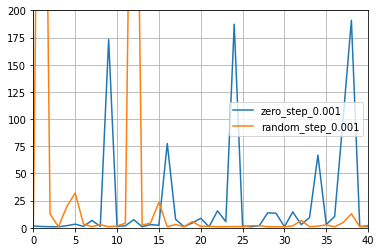

In [50]:
import matplotlib.pyplot as plt



plt.plot(np.arange(len(pred_plot1)),pred_plot1, label="zero_step_0.001")
plt.plot(np.arange(len(pred_plot2)),pred_plot2, label="random_step_0.001")  

plt.legend()
plt.grid()
plt.ylim([0, 200])
plt.xlim([0, 40])

plt.show()


**22.** Обучите линейную регрессию с функционалом MSPE и его регуляризованным вариантом на обучающей выборке при помощи метода градиентного спуска и изобразите кривые зависимости значения функционала от номера итерации. Исследуйте зависимость скорости сходимости от наличия регуляризации. Обоснуйте, почему так происходит.

__ОТВЕТ:__ Число обусловленности матрицы X существенно влияет на скорость сходимости градиентного спуска: чем более вытянуты линии уровня функции потерь, тем хуже

Темп обучения α тоже сильно влияет на поведение градиентного спуска; вообще говоря, он является гиперпараметром алгоритма, и его, возможно, придётся подбирать отдельно. Другими гиперпараметрами являются максимальное число итераций S и/или порог tolerance

Решение может быть не уникальным и сколь угодно большим по модулю, что создаёт вычислительные трудности (малые погрешности признаков сильно возрастают при предсказании ответа, а в градиентном спуске накапливается погрешность из-за операций со слишком большими числами).

Редко бывает так, что признаки строго линейно зависимы, а вот быть приближённо линейно зависимыми они вполне могут быть (такая ситуация называется мультиколлинеарностью).
 
В случае, когда несколько признаков «почти» линейно независимы, веса  𝑤𝑖  при них теряют физический смысл. Может даже оказаться, что вес признака, с ростом которого таргет, казалось бы, должен увеличиваться, станет отрицательным. Это делает модель не только неточной, но и принципиально не интерпретируемой. Вообще, неадекватность знаков или величины весов – хорошее указание на мультиколлинеарность.

Для того, чтобы справиться с этой проблемой, задачу обычно регуляризуют, то есть добавляют к ней дополнительное ограничение на величину вектора весов. 

In [51]:
w0 = np.random.rand( x_train.shape[1])
ww, hist_loss1 = get_w_by_grad(x_train/100, y_train, w0, lr=0.005, loss_mode='mpse', reg_mode=None,n_steps=50, reg_coeff=0.05)

In [52]:
w0 = np.random.rand( x_train.shape[1])
ww, hist_loss_l2 = get_w_by_grad(x_train/100, y_train, w0, lr=0.005, loss_mode='mpse', reg_mode="l2",n_steps=50, reg_coeff=0.005)


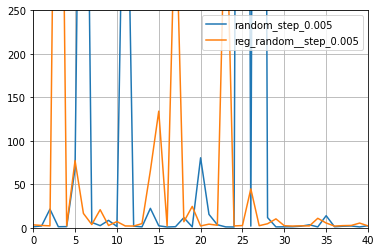

In [53]:
import matplotlib.pyplot as plt
plt.plot(np.arange(len(hist_loss1)),hist_loss1, label="random_step_0.005")
plt.plot(np.arange(len(hist_loss_l2)),hist_loss_l2, label="reg_random__step_0.005")  

plt.legend()
plt.grid()
plt.ylim([0, 250])
plt.xlim([0, 40])

plt.show()


Метод градиентного спуска может быть весьма трудозатратен в случае большого размера обучающей выборки. Поэтому часто используют метод стохастического градиентного спуска, где на каждой итерации выбирается случайный объект из обучающей выборки и обновление весов происходит только по этому объекту. 

**23.**  Реализуйте метод стохастического градиентного спуска (SGD) для описанных функционалов ($MSPE$ и его регуляризованный вариант). Функция должна иметь параметры и возвращаемое значение, аналогичные оным функции grad\_descent из п.21. Кроме того, должен использоваться аналогичный критерий останова.

In [54]:
# возвращает вектор прогнозов линейной модели с вектором весов w для выборки X
def make_pred(X, w):
    return X.dot(w)

In [55]:
import numpy as np
# возвращает значение функционала MSPE для выборки (X, y) и вектора весов w
def get_func_mspe(w, X, y):
    
    # добавим к y шум, чтобы не делить на ноль
    pred = X.dot(w)
    ans = np.mean( ( (pred - y ) / (y + np.random.normal(1e-7)) ) **2 ) 
    return ans

In [56]:
# возвращает градиент функционала MSPE для выборки (X, y) и вектора весов w
def get_grad(w, X, y):
    pred = X.dot(w)
    return ( ( ((pred - y) / (y + np.random.normal(1e-7)) / (y + np.random.normal(1e-7))).dot(X) ) * 2 ) / X.shape[0]

In [57]:
# возвращает значение регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_func(w, X, y):
    pred = X.dot(w)
    
    
    #l1 = np.mean( np.true_divide( (X.dot(w) - Y), X.dot(w)) **2 ) + np.sum(abs(w))
    l = np.mean( ( (pred - y ) / (y + np.random.normal(1e-7)) ) **2 )  + np.sum(w * 0.5) 
    
    return l
    

In [58]:
# возвращает градиент регуляризованного функционала MSPE для выборки (X, y) и вектора весов w
def get_reg_grad(w, X, y):
    pred = X.dot(w)
    return (( (X.T.dot((pred - y) / (y + np.random.normal(1e-7)) ** 2 )) ) * 2 ) / X.shape[0]  + (2 * w / X.shape[0])

In [59]:
def sgd(X, y, w0, step_size_0, max_iter, eps, is_reg):
    
    w = w0.copy()
    iterat = 0
    w_list = list([w])
    history_pred = []
    
    if is_reg == True:
        
        gradient = get_reg_grad
        func = get_reg_func
   
    else:
        
        gradient = get_grad
        func = get_func_mspe
         
    while iterat < max_iter :
        
        for indx in np.random.choice(X.shape[0] - 1, 5):
    
            iterat += 1
            step_size = step_size_0 / ((iterat+1)**0.51)

            #отбираем батч
            X_batch = X.iloc[:indx]
            Y_batch = y.iloc[:indx]

            #ошибка и значение
            predict = func(w, X_batch, Y_batch)
            history_pred.append(predict)

            # посчитать градиент
            grad = gradient(w, X_batch, Y_batch)

            #обновить веса
            w_pre = w.copy()
            w = w - step_size * grad
            w_list.append(w)

            # расчет евклидовой нормы между соседними векторами
            dist = np.linalg.norm( w_pre - w)
        

        #print("Проход:{}, вес:  \n\n Евклид:{}\n\n MSPE:{} \n\n".format(iterat, dist, predict))
        
        #if dist < eps or predict > 10000:
            
            #print("Выполнилось условие остановки  \n\n")
            #break
        #else:
            #continue
     
    return  w, history_pred

Обучите линейную регрессию с функционалом $MSPE$ и его регуляризованным вариантом на обучающей выборке при помощи метода стохастического градиентного спуска, подобрав при этом размер шага, при котором метод будет сходиться. Нарисуйте график сходимости. Выведите значения $MSPE, MSE, R^2$ на контрольной выборке.

In [60]:
w0 = np.random.rand( x_train.shape[1])
w, pred_sgd = sgd(x_train, y_train, w0, 0.0001, 40, 1e-3, False)


In [61]:
w0 = np.random.rand( x_train.shape[1])
w, pred_reg_sgd = sgd(x_train, y_train, w0, 0.0001, 40, 1e-2, True)


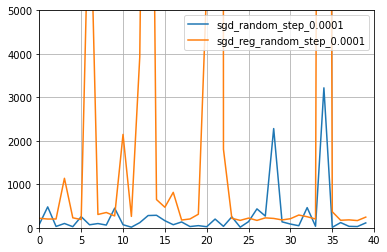

In [62]:
plt.plot(np.arange(len(pred_sgd)),pred_sgd, label="sgd_random_step_0.0001")
plt.plot(np.arange(len(pred_reg_sgd)),pred_reg_sgd, label="sgd_reg_random_step_0.0001")  

plt.legend()
plt.grid()
plt.ylim([0, 5000])
plt.xlim([0, 40])

plt.show()


In [63]:

print("MSE for test: {}".format(mean_squared_error(make_pred(x_test,w), y_test)))
print("MPSE for test:{}".format(get_func_mspe(w, x_test, y_test)))
print("R2 score: {}".format(r2_score(make_pred( x_test, w), y_test)))

MSE for test: 1439.4874268298065
MPSE for test:50.16852554032468
R2 score: -10.835778715832358


**24.** Аналогично п.22 исследуйте зависимость скорости сходимости метода SGD от наличия регуляризации. Обоснуйте, почему так происходит.

__ОТВЕТ:__ 
Шаги стохастического градиентного спуска заметно более шумные, но их значительно быстрее считать. И в итоге они тоже сходятся к оптимальному значению (ппо крайней мере для хорошо подобранных коэффициентов темпа обучения в случае выпуклого функционала качества) из-за того, что матожидание оценки градиента на батче равно самому градиенту.
    
  Для сложных моделей и лоссов стохастический градиентный спуск может сходиться плохо или застревать в локальных минимумах, поэтому придумано множество его улучшений.

**25.** Обучите стандартную линейную регрессию с функционалом качества MSE на обучающей выборке и выведите значение MSPE полученного решения на контрольной выборке. Как оно соотносится с аналогичным результатом для решения, полученного в п.22? Почему?

In [1255]:
import numpy as np
# возвращает значение функционала MSPE для выборки (X, y) и вектора весов w
def get_func_mspe(w, X, y):
    
    # добавим к y шум, чтобы не делить на ноль
    pred = X.dot(w)
    ans = np.mean( ( (pred - y ) / (y + np.random.normal(1e-7)) ) **2 ) 
    return ans

In [1168]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import r2_score, mean_squared_error


# model fiting w coef
lr = LinearRegression()
lr_model = lr.fit(x_train.iloc[:1000], y_train.iloc[:1000])

# mspe score
mspe_test = get_func_mspe(lr_model.coef_, x_test, y_test )
mspe_train = get_func_mspe(lr_model.coef_, x_train, y_train )

print(" MSPE for test:{} \n MSPE for train:{}".format(mspe_test, mspe_train))

 MSPE for test:1.0869957064532028e+30 
 MSPE for train:3.033109690072993e+26


__ОТВЕТ:__
Самописная MPSE for test:2300.3130925348282  точнее чем для линейной регрессии из коробки, т.к.инструмент LinearRegression из sklearn  решает оптимизационную задачу для mean squared error